# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [3]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [4]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

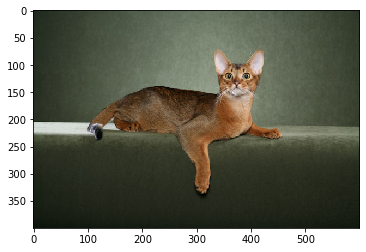

In [5]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


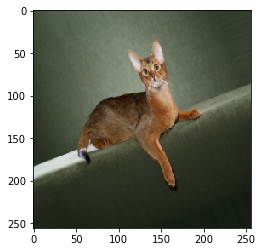

In [31]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50, 0, 50]
)

Found 1 images belonging to 1 classes.


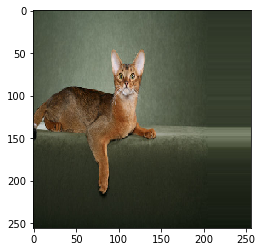

In [44]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


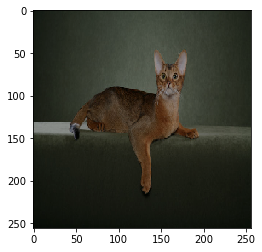

In [59]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


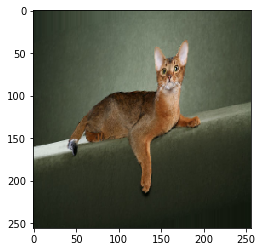

In [64]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


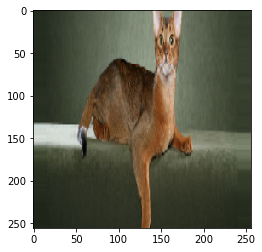

In [72]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


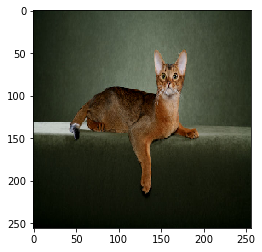

In [86]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [87]:
x.mean()

51.38036

In [89]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


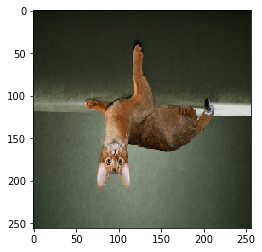

In [92]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [101]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [102]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.05944644 0.84889674 [[5]]
120.70756512369792


### Samplewise

In [98]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-4.9670536e-08 1.0 [[4]]


# Task 10: Rescale and Preprocessing Function

In [109]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [110]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [111]:
print(x.mean(), x.std(), y)

0.17727482 0.6886367 [[9]]


# Task 11: Using in Model Training

In [112]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [115]:
# Your code here
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, 
        input_shape=(32, 32, 3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [118]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=10, steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
Epoch 1/10
10/10 [==============================] - 5s 474ms/step - loss: 2.7081 - accuracy: 0.2281
Epoch 2/10
10/10 [==============================] - 5s 484ms/step - loss: 2.2359 - accuracy: 0.2688
Epoch 3/10
10/10 [==============================] - 5s 476ms/step - loss: 2.2167 - accuracy: 0.2406
Epoch 4/10
10/10 [==============================] - 5s 482ms/step - loss: 2.0285 - accuracy: 0.2812
Epoch 5/10
10/10 [==============================] - 5s 473ms/step - loss: 1.9863 - accuracy: 0.3406
Epoch 6/10
10/10 [==============================] - 5s 521ms/step - loss: 2.0480 - accuracy: 0.3219
Epoch 7/10
10/10 [==============================] - 5s 471ms/step - loss: 1.9770 - accuracy: 0.3094
Epoch 8/10
10/10 [==============================] - 5s 466ms/step - loss: 1.8531 - accuracy: 0.3187
Epoch 9/10
10/10 [==============================] - 5s 474ms/step - loss: 1.8565 - accuracy: 0.3438
Epoch 10/10
10/10 [==============================] - 5s 